## 0. Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 1. EDA

In [2]:
df = pd.read_csv("INPUT/diamonds_train.csv").drop(columns={"Unnamed: 0"})
print(df.shape)
df.head()

(40345, 10)


,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


#### Check for nulls, dtypes & descriptive analysis

In [3]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [5]:
df.describe()

,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.795652,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,0.470806,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,4.010000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


## 2. Feature Engineering

In [6]:
#make ordinal encoding of qualitative vars based on priceG

cut_dict = {"Ideal":5, "Premium":4, "Very Good":3, "Good":2, "Fair":1}

color_dict = {"G":7, "H":6, "F":5, "E":4, "I":3, "D":2, "J":1}

clarity_dict = {"SI1":8, "VS2":7, "SI2":6, "VS1":5, "VVS2":4, "VVS1":3, "IF":2, "I1":1}

df["cut_ord"] = df.cut.map(cut_dict)
df["color_ord"] = df.color.map(color_dict)
df["clarity_ord"] = df.clarity.map(clarity_dict)

## 3. Relation between varaibles

#### Correlation between quantitative y and quantitative xi

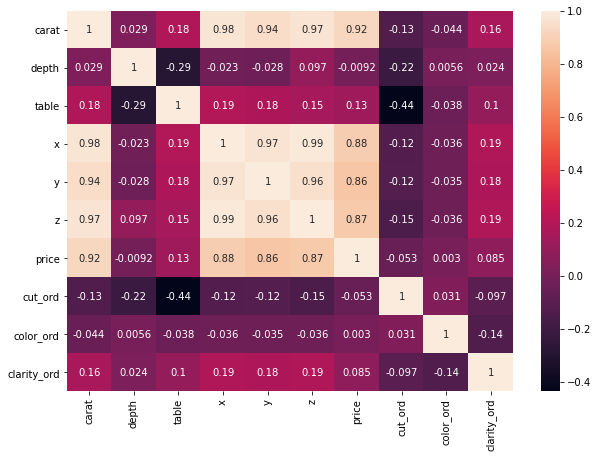

In [7]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### ANOVA test between quantitative variable and ordinal encoded qualitative ones

Feature 0: 0.000000
Feature 1: 0.552872
Feature 2: 0.000000


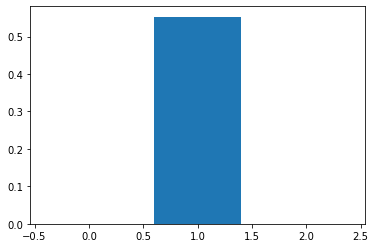

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_regression, chi2

#feature selection
#f_regression makes an ANOVA test between a continuos dependent variable and qualitative independent ones
#for the opposite realtion use f_classif, for y = quialitative & xi = qualitative use chi2
fs = SelectKBest(score_func=f_regression, k='all')

y = df.price
#X = df.loc[:, 'cut', 'color', 'clarity']
#Note that vars need to be encoded, ordinal or one hot. Direct str won't work
X = df.iloc[:, -1:-4:-1]

#learn relationship from training data
fs.fit(X, y)

#feature selection
#what are scores for the features
for i in range(len(fs.pvalues_)):
    print('Feature %d: %f' % (i, fs.pvalues_[i]))
#plot the scores
plt.bar([i for i in range(len(fs.pvalues_))], fs.pvalues_)
plt.show()

## 4. Visual Representation of variables

#### Continuous

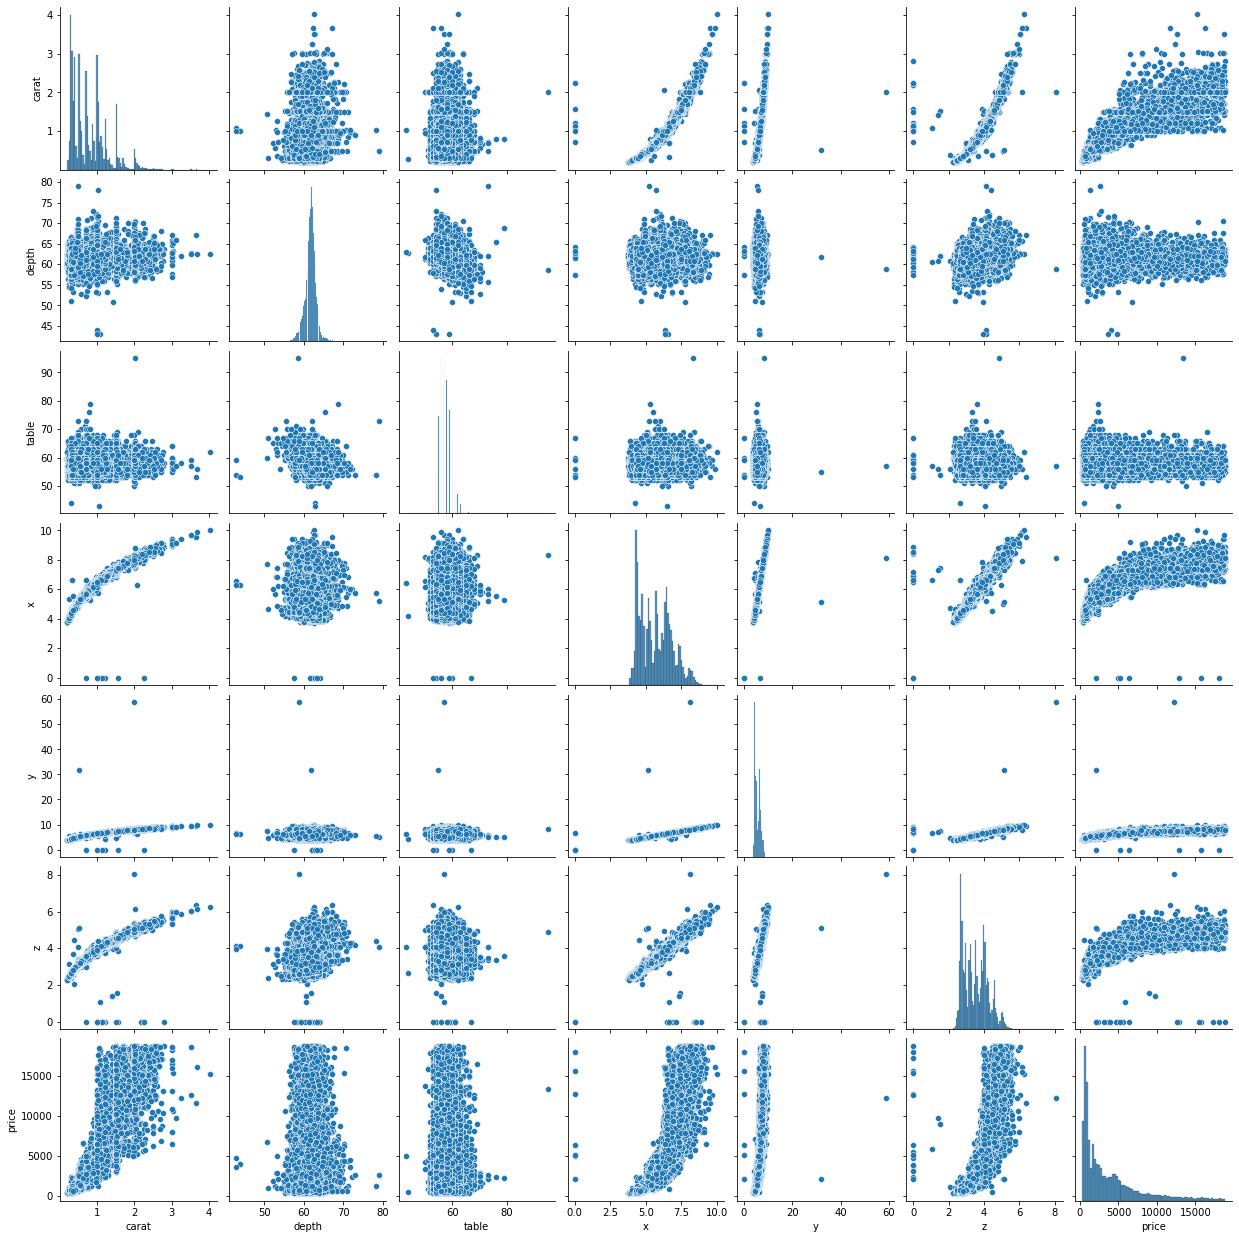

In [9]:
sns.pairplot(df.iloc[:, :-3])
plt.show()

#### Qualitative ordinal encoded

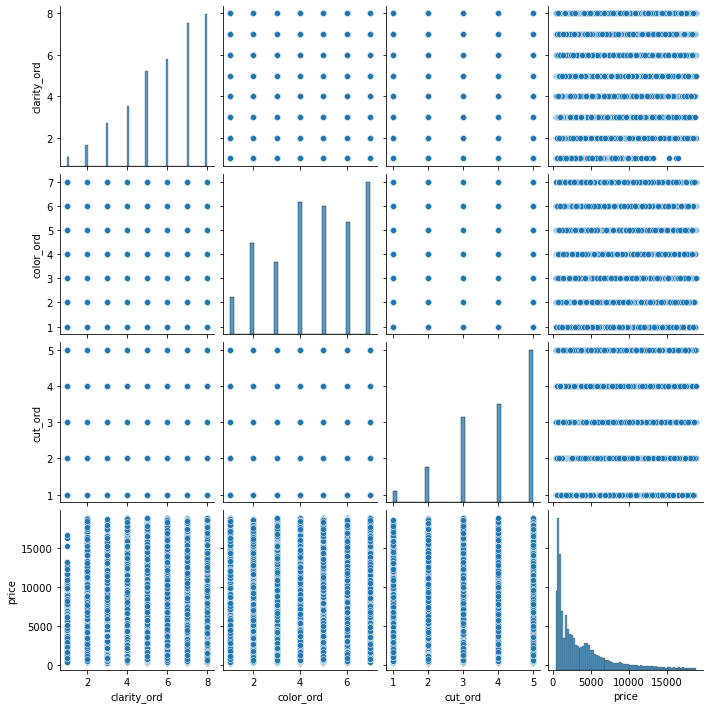

In [10]:
sns.pairplot(df.iloc[:, -1:-5:-1])
plt.show()

## 5. Simple Linear Regression with Gradient Descent

In [11]:
#
y = [df.price]
x = [df.carat]
points = np.array(x + y)

In [12]:
x

[0        1.21
 1        0.28
 2        0.42
 3        0.26
 4        1.10
          ... 
 40340    1.55
 40341    0.36
 40342    0.57
 40343    1.01
 40344    0.54
 Name: carat, Length: 40345, dtype: float64]

In [13]:
points[0]

array([1.21, 0.28, 0.42, ..., 0.57, 1.01, 0.54])

- The class **LinearRegressionGD** computes a Simple Linear Regression with Gradient Descent for $y = mx +b$
- The input for the run function, "points", must be a 2d arr being arr[0] = x and arr[1] = y

In [14]:
# y = mx + b
# m is slope, b is y-intercept

class LinearRegressionGD():
    
    def __init__(self, lr=None, _b=None, _m=None, n_iter=None):
        self.learning_rate = lr
        self.initial_b = _b # initial y-intercept guess
        self.initial_m = _m # initial slope guess
        self.num_iterations = n_iter

    def compute_error_for_line_given_points(self, b, m, points):
        totalError = 0
        for i in range(0, len(points[0])):
            x = points[0, i]
            y = points[1, i]
            totalError += (y - (m * x + b)) ** 2
        return totalError / float(len(points[0]))

    def step_gradient(self, b_current, m_current, points, learningRate):
        b_gradient = 0
        m_gradient = 0
        N = float(len(points[0]))
        for i in range(0, len(points[0])):
            x = points[0, i]
            y = points[1, i]

            b_gradient -= (2/N) * (y - ((m_current * x) + b_current))
            #the 1st x here is to determine the direction to minimize the error
            m_gradient -= (2/N) * x * (y - ((m_current * x) + b_current))

        new_b = b_current - (learningRate * b_gradient)
        new_m = m_current - (learningRate * m_gradient)
        return [new_b, new_m]

    def gradient_descent_runner(self, points, starting_b, starting_m, learning_rate, num_iterations):
        b = starting_b
        m = starting_m
        residuals = []

        for i in range(num_iterations):

            print(f"Slope: {m}, bias {b}, in iter number {i}")

            e = self.compute_error_for_line_given_points(b, m, points)
            residuals.append(e)

            if residuals[i] > residuals[i-1]:
                print(f"Gradient Descent has reached the optimal point at slope {m}, bias {b}, and iteration {i}")
                break

            print()
            print(f"Error: {e}, in iter number {i}")
            print()

            b, m = self.step_gradient(b, m, points, learning_rate)

        return [b, m]

    def run(self, points):
        print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(self.initial_b, self.initial_m, self.compute_error_for_line_given_points(self.initial_b, self.initial_m, points)))
        print("Running...")
        [b, m] = self.gradient_descent_runner(points, self.initial_b, self.initial_m, self.learning_rate, self.num_iterations)
        print("After {0} iterations b = {1}, m = {2}, error = {3}".format(self.num_iterations, b, m, self.compute_error_for_line_given_points(b, m, points)))
        
        return b, m
        
    def predict(self, points):
        x_arr = points[1, :]
        b = self.initial_b
        m = self.initial_m
        
        predicted_y = []
        
        for x in x_arr:
            predicted_y.append((m * x) + b)
            
        return predicted_y
    
    def mse(self, y_arr, predicted_y):
        error = 0
        
        for y, pred_y in zip(y_arr, predicted_y):
            error += (y - pred_y)**2
            
        return error/len(y_arr)

#### Linear Regression with Oirignal Data

In [15]:
LinearRegressionGD(lr=0.5, _b=0, _m=0, n_iter=100).run(points)

Starting gradient descent at b = 0, m = 0, error = 31254416.81868881
Running...
Slope: 0, bias 0, in iter number 0

Error: 31254416.81868881, in iter number 0

Slope: 4850.475183541891, bias 3924.089924402062, in iter number 1

Error: 19199096.613708366, in iter number 1

Slope: 2432.965876108877, bias 64.79963645306316, in iter number 2

Error: 12458187.759871336, in iter number 2

Slope: 5152.3903734156265, bias 1988.295755526043, in iter number 3

Error: 8612456.90665044, in iter number 3

Slope: 4017.048092547625, bias -175.4197886493614, in iter number 4

Error: 6363647.510744694, in iter number 4

Slope: 5573.66463123743, bias 727.9175694962933, in iter number 5

Error: 5010152.742290782, in iter number 5

Slope: 5081.07529801477, bias -510.6074950603045, in iter number 6

Error: 4169141.101602801, in iter number 6

Slope: 5994.944463375438, bias -118.67780617045497, in iter number 7

Error: 3629000.9736054656, in iter number 7

Slope: 5815.876192099451, bias -845.799636687077, i


Error: 2380365.9021441685, in iter number 72

Slope: 7796.92824996553, bias -2279.523865483601, in iter number 73

Error: 2380365.8979621357, in iter number 73

Slope: 7796.958678560375, bias -2279.551643134924, in iter number 74

Error: 2380365.8947850815, in iter number 74

Slope: 7796.985200718934, bias -2279.5758537073143, in iter number 75

Error: 2380365.892371539, in iter number 75

Slope: 7797.008317177882, bias -2279.5969561158554, in iter number 76

Error: 2380365.8905379586, in iter number 76

Slope: 7797.02846582339, bias -2279.615348772685, in iter number 77

Error: 2380365.8891450274, in iter number 77

Slope: 7797.046027271113, bias -2279.631380082811, in iter number 78

Error: 2380365.888086772, in iter number 78

Slope: 7797.06133402789, bias -2279.6453528838406, in iter number 79

Error: 2380365.887282869, in iter number 79

Slope: 7797.074675355285, bias -2279.657531735506, in iter number 80

Error: 2380365.886672135, in iter number 80

Slope: 7797.08630377611, bias

(-2279.7349124960947, 7797.159442799651)

#### Linear Regression with Standard Scaler

In [16]:
from sklearn.preprocessing import StandardScaler

ss_scaler = StandardScaler()

#as said before LinearRegressionGD().run() input must be a 2d array
#if we scale together x and y as points, the scaler scales the data comparing both variables
#therefore we scale them separately and reshape to have a 2d dim again
#finally we join both scaled variables as a 2d arr
ss_scaled_x = ss_scaler.fit_transform(np.array(x).reshape(-1, 1))
ss_scaled_y = ss_scaler.fit_transform(np.array(y).reshape(-1, 1))

ss_scaled_points = np.array([ss_scaled_x.flatten()] + [ss_scaled_y.flatten()])

In [17]:
len(set(points[0]))

265

In [18]:
len(set(ss_scaled_points[0]))

265

In [79]:
b, m = LinearRegressionGD(lr=0.5, _b=0, _m=0, n_iter=100).run(ss_scaled_points)

y_pred = LinearRegressionGD(_b=b, _m=m).predict(ss_scaled_points)

error = LinearRegressionGD().mse(y_pred, ss_scaled_points[1])

predicted_df = pd.DataFrame({"y":ss_scaled_points[1], "y_pred":y_pred})

print()
print("error", error)

predicted_df

Starting gradient descent at b = 0, m = 0, error = 0.9999999999999896
Running...
Slope: 0, bias 0, in iter number 0

Error: 0.9999999999999896, in iter number 0

Slope: 0.9218868703507922, bias -9.706997575534282e-18, in iter number 1

Error: 0.15012459827481633, in iter number 1

Slope: 0.9218868703507939, bias 8.034658076122754e-17, in iter number 2
Gradient Descent has reached the optimal point at slope 0.9218868703507939, bias 8.034658076122754e-17, and iteration 2
After 100 iterations b = 8.034658076122754e-17, m = 0.9218868703507939, error = 0.1501245982748164

error 0.0061016610235936665


,y,y_pred
0,0.554982,0.511630
1,-0.851866,-0.785324
2,-0.708469,-0.653128
3,-0.834789,-0.769581
4,0.269443,0.248396
...,...,...
40340,1.954798,1.802103
40341,-0.830018,-0.765182
40342,-0.667283,-0.615160
40343,1.517073,1.398570


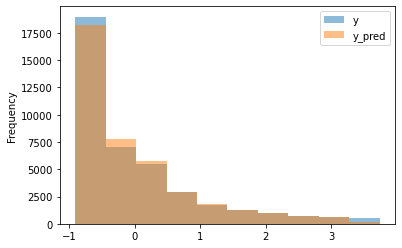

In [80]:
predicted_df.plot.hist(alpha=0.5)
plt.show()

##### Look how a different learning rate affects the speed and accuracy of the model

In [81]:
b, m = LinearRegressionGD(lr=0.005, _b=0, _m=0, n_iter=100).run(ss_scaled_points)

y_pred = LinearRegressionGD(_b=b, _m=m).predict(ss_scaled_points)

error = LinearRegressionGD().mse(y_pred, ss_scaled_points[1])

predicted_df = pd.DataFrame({"y":ss_scaled_points[1], "y_pred":y_pred})

print()
print("error", error)

predicted_df

Starting gradient descent at b = 0, m = 0, error = 0.9999999999999896
Running...
Slope: 0, bias 0, in iter number 0

Error: 0.9999999999999896, in iter number 0

Slope: 0.009218868703507922, bias -9.706997575534283e-20, in iter number 1

Error: 0.9830874795056624, in iter number 1

Slope: 0.01834554871998076, bias -8.388675496427689e-19, in iter number 2

Error: 0.9665115181691898, in iter number 2

Slope: 0.02738096193628902, bias -1.1795780823463386e-18, in iter number 3

Error: 0.9502654184632774, in iter number 3

Slope: 0.036326021020434064, bias -7.847929662900543e-19, in iter number 4

Error: 0.9343426161415356, in iter number 4

Slope: 0.04518162951373766, bias -1.5716526929714092e-18, in iter number 5

Error: 0.9187366775859712, in iter number 5

Slope: 0.05394868192210819, bias -2.2247150953044748e-18, in iter number 6

Error: 0.9034412972076823, in iter number 6

Slope: 0.06262806380639513, bias -2.4314250157524142e-18, in iter number 7

Error: 0.8884502948989189, in iter nu


Error: 0.366766133550262, in iter number 68

Slope: 0.4610936751715847, bias 8.47486956914029e-18, in iter number 69

Error: 0.36245496699828605, in iter number 69

Slope: 0.46570160712337677, bias 8.877176337768192e-18, in iter number 70

Error: 0.3582295926606878, in iter number 70

Slope: 0.4702634597556509, bias 9.136927461373195e-18, in iter number 71

Error: 0.3540883032724019, in iter number 71

Slope: 0.47477969386160235, bias 9.470099400846202e-18, in iter number 72

Error: 0.3500294255429544, in iter number 72

Slope: 0.4792507656264942, bias 1.006734233195521e-17, in iter number 73

Error: 0.34605131948031914, in iter number 73

Slope: 0.48367712667373725, bias 1.011353950889846e-17, in iter number 74

Error: 0.3421523777283333, in iter number 74

Slope: 0.48805922411050784, bias 1.0761604416842725e-17, in iter number 75

Error: 0.33833102491721095, in iter number 75

Slope: 0.4923975005729107, bias 1.1357017756785664e-17, in iter number 76

Error: 0.3345857170270245, in it

,y,y_pred
0,0.554982,0.324357
1,-0.851866,-0.497870
2,-0.708469,-0.414062
3,-0.834789,-0.487890
4,0.269443,0.157475
...,...,...
40340,1.954798,1.142475
40341,-0.830018,-0.485101
40342,-0.667283,-0.389991
40343,1.517073,0.886648


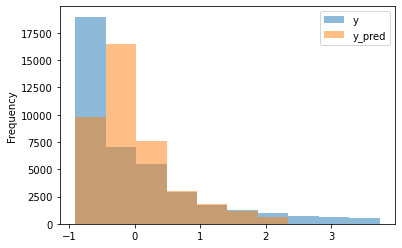

In [82]:
predicted_df.plot.hist(alpha=0.5)
plt.show()

#### Linear Regression with MinMax Scaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

mm_scaled_x = mm_scaler.fit_transform(np.array(x).reshape(-1, 1))
mm_scaled_y = mm_scaler.fit_transform(np.array(y).reshape(-1, 1))

mm_scaled_points = np.array([mm_scaled_x.flatten()] + [mm_scaled_y.flatten()])

In [22]:
len(set(points[0]))

265

In [23]:
len(set(mm_scaled_points[0]))

265

##### Best Output; we will use it for prediction

In [83]:
b, m = LinearRegressionGD(lr=0.5, _b=0, _m=0, n_iter=100).run(mm_scaled_points)

y_pred = LinearRegressionGD(_b=b, _m=m).predict(mm_scaled_points)

error = LinearRegressionGD().mse(y_pred, mm_scaled_points[1])

predicted_df = pd.DataFrame({"y":mm_scaled_points[1], "y_pred":y_pred})

print()
print("error", error)

predicted_df

Starting gradient descent at b = 0, m = 0, error = 0.08422823185975745
Running...
Slope: 0, bias 0, in iter number 0

Error: 0.08422823185975745, in iter number 0

Slope: 0.0549499825728248, bias 0.19457548801655325, in iter number 1

Error: 0.0437926490496459, in iter number 1

Slope: 0.07729806742917535, bias 0.18598465675639483, in iter number 2

Error: 0.04267977554030206, in iter number 2

Slope: 0.10010176195599241, bias 0.18249077710440278, in iter number 3

Error: 0.04162328950474177, in iter number 3

Slope: 0.12254612039788063, bias 0.1789256678429327, in iter number 4

Error: 0.04059806617978583, in iter number 4

Slope: 0.14465654845923304, bias 0.17541673686445344, in iter number 5

Error: 0.039603166450791295, in iter number 5

Slope: 0.16643752411267188, bias 0.17196001226380192, in iter number 6

Error: 0.03863769341140157, in iter number 6

Slope: 0.18789396846847092, bias 0.16855479395873246, in iter number 7

Error: 0.037700776692433165, in iter number 7

Slope: 0.20


Error: 0.011884987675213255, in iter number 68

Slope: 1.0471896812991985, bias 0.03218133510139419, in iter number 69

Error: 0.01173935026280815, in iter number 69

Slope: 1.055523118292982, bias 0.030858787333456882, in iter number 70

Error: 0.011598020447243295, in iter number 70

Slope: 1.0637323889658914, bias 0.02955594522725887, in iter number 71

Error: 0.01146087082038747, in iter number 71

Slope: 1.0718193433679417, bias 0.028272515172910247, in iter number 72

Error: 0.01132777774252903, in iter number 72

Slope: 1.079785803983823, bias 0.0270082079352418, in iter number 73

Error: 0.011198621230915525, in iter number 73

Slope: 1.087633566143617, bias 0.025762738588622776, in iter number 74

Error: 0.011073284851588677, in iter number 74

Slope: 1.095364398427394, bias 0.02453582645274968, in iter number 75

Error: 0.010951655614421742, in iter number 75

Slope: 1.1029800430637826, bias 0.0233271950293918, in iter number 76

Error: 0.010833623871257619, in iter number 7

,y,y_pred
0,0.314082,0.393421
1,0.011140,0.013137
2,0.042018,0.051899
3,0.014817,0.017753
4,0.252596,0.316237
...,...,...
40340,0.615509,0.771804
40341,0.015845,0.019043
40342,0.050887,0.063031
40343,0.521252,0.653483


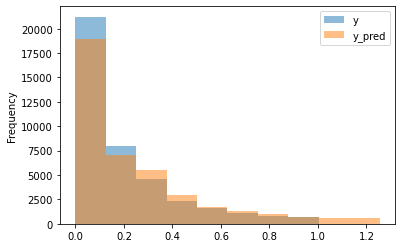

In [84]:
predicted_df.plot.hist(alpha=0.5)
plt.show()

In [85]:
b, m = LinearRegressionGD(lr=0.005, _b=0, _m=0, n_iter=100).run(mm_scaled_points)

y_pred = LinearRegressionGD(_b=b, _m=m).predict(mm_scaled_points)

error = LinearRegressionGD().mse(y_pred, mm_scaled_points[1])

predicted_df = pd.DataFrame({"y":mm_scaled_points[1], "y_pred":y_pred})

print()
print("error", error)

predicted_df

Starting gradient descent at b = 0, m = 0, error = 0.08422823185975745
Running...
Slope: 0, bias 0, in iter number 0

Error: 0.08422823185975745, in iter number 0

Slope: 0.000549499825728248, bias 0.0019457548801655325, in iter number 1

Error: 0.08341478170326837, in iter number 1

Slope: 0.0010957394616848482, bias 0.003871193128403347, in iter number 2

Error: 0.08261769168670337, in iter number 2

Slope: 0.001638751965377187, bias 0.0057765230079843705, in iter number 3

Error: 0.08183662827470774, in iter number 3

Slope: 0.0021785700555881273, bias 0.007661950647864985, in iter number 4

Error: 0.08107126473310138, in iter number 4

Slope: 0.002715226115847259, bias 0.009527680064559745, in iter number 5

Error: 0.0803212809901857, in iter number 5

Slope: 0.0032487521978666507, bias 0.011373913183789892, in iter number 6

Error: 0.0795863635008845, in iter number 6

Slope: 0.0037791800249413064, bias 0.013200849861910169, in iter number 7

Error: 0.07886620511367638, in iter nu

Slope: 0.03174138175087383, bias 0.095882137089708, in iter number 69

Error: 0.053612236649698074, in iter number 69

Slope: 0.03212837535893126, bias 0.09681944640587963, in iter number 70

Error: 0.05340757200303581, in iter number 70

Slope: 0.03251374990547343, bias 0.09774677760653466, in iter number 71

Error: 0.053206858246266184, in iter number 71

Slope: 0.03289752163314875, bias 0.09866423300405464, in iter number 72

Error: 0.05301001488226297, in iter number 72

Slope: 0.0332797066182012, bias 0.09957191386230359, in iter number 73

Error: 0.05281696305531015, in iter number 73

Slope: 0.03366032077217563, bias 0.10046992040737351, in iter number 74

Error: 0.05262762551763888, in iter number 74

Slope: 0.034039379843605624, bias 0.1013583518382195, in iter number 75

Error: 0.052441926596632965, in iter number 75

Slope: 0.03441689941968405, bias 0.10223730633718592, in iter number 76

Error: 0.052259792162711545, in iter number 76

Slope: 0.03479289492791647, bias 0.1031

,y,y_pred
0,0.314082,0.134250
1,0.011140,0.121207
2,0.042018,0.122537
3,0.014817,0.121365
4,0.252596,0.131603
...,...,...
40340,0.615509,0.147227
40341,0.015845,0.121410
40342,0.050887,0.122918
40343,0.521252,0.143169


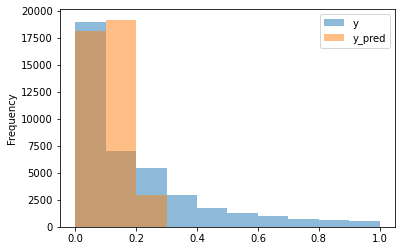

In [78]:
predicted_df.plot.hist(alpha=0.5)
plt.show()

#### BEST Prediction

In [26]:
b, m = LinearRegressionGD(lr=0.5, _b=0, _m=0, n_iter=100).run(mm_scaled_points)

y_pred = LinearRegressionGD(_b=b, _m=m).predict(mm_scaled_points)

error = LinearRegressionGD().mse(y_pred, mm_scaled_points[1])

predicted_df = pd.DataFrame({"y":mm_scaled_points[1], "y_pred":y_pred})

print()
print("error", error)

predicted_df

Starting gradient descent at b = 0, m = 0, error = 0.08422823185975745
Running...
Slope: 0, bias 0, in iter number 0

Error: 0.08422823185975745, in iter number 0

Slope: 0.0549499825728248, bias 0.19457548801655325, in iter number 1

Error: 0.0437926490496459, in iter number 1

Slope: 0.07729806742917535, bias 0.18598465675639483, in iter number 2

Error: 0.04267977554030206, in iter number 2

Slope: 0.10010176195599241, bias 0.18249077710440278, in iter number 3

Error: 0.04162328950474177, in iter number 3

Slope: 0.12254612039788063, bias 0.1789256678429327, in iter number 4

Error: 0.04059806617978583, in iter number 4

Slope: 0.14465654845923304, bias 0.17541673686445344, in iter number 5

Error: 0.039603166450791295, in iter number 5

Slope: 0.16643752411267188, bias 0.17196001226380192, in iter number 6

Error: 0.03863769341140157, in iter number 6

Slope: 0.18789396846847092, bias 0.16855479395873246, in iter number 7

Error: 0.037700776692433165, in iter number 7

Slope: 0.20


Error: 0.01173935026280815, in iter number 69

Slope: 1.055523118292982, bias 0.030858787333456882, in iter number 70

Error: 0.011598020447243295, in iter number 70

Slope: 1.0637323889658914, bias 0.02955594522725887, in iter number 71

Error: 0.01146087082038747, in iter number 71

Slope: 1.0718193433679417, bias 0.028272515172910247, in iter number 72

Error: 0.01132777774252903, in iter number 72

Slope: 1.079785803983823, bias 0.0270082079352418, in iter number 73

Error: 0.011198621230915525, in iter number 73

Slope: 1.087633566143617, bias 0.025762738588622776, in iter number 74

Error: 0.011073284851588677, in iter number 74

Slope: 1.095364398427394, bias 0.02453582645274968, in iter number 75

Error: 0.010951655614421742, in iter number 75

Slope: 1.1029800430637826, bias 0.0233271950293918, in iter number 76

Error: 0.010833623871257619, in iter number 76

Slope: 1.1104822163225998, bias 0.022136571940079487, in iter number 77

Error: 0.010719083217062431, in iter number 

,y,y_pred
0,0.314082,0.393421
1,0.011140,0.013137
2,0.042018,0.051899
3,0.014817,0.017753
4,0.252596,0.316237
...,...,...
40340,0.615509,0.771804
40341,0.015845,0.019043
40342,0.050887,0.063031
40343,0.521252,0.653483


In [30]:
predicted_df.describe()

,y,y_pred
count,40345.000000,40345.000000
mean,0.194575,0.243404
std,0.215336,0.270312
min,0.000000,-0.000847
25%,0.033636,0.041377
50%,0.111886,0.139604
75%,0.269684,0.337688
max,1.000000,1.254456


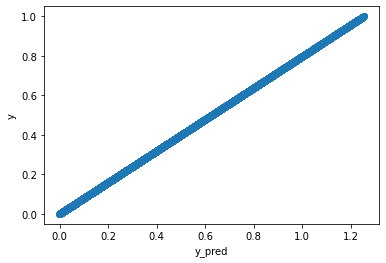

In [28]:
plt.scatter(y_pred, mm_scaled_points[1])
plt.ylabel("y")
plt.xlabel("y_pred")
plt.show()

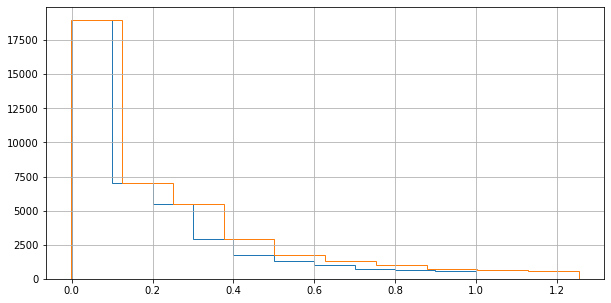

In [60]:
plt.figure(figsize=(10, 5))

predicted_df.y.hist(histtype="step", label="y")
predicted_df.y_pred.hist(histtype="step", label="y_pred")
plt.show()

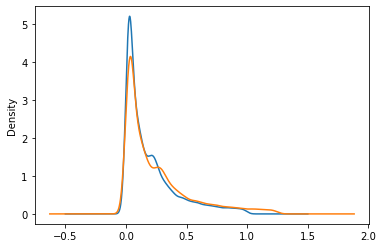

In [58]:
predicted_df.y.plot(kind="kde", label="y")
predicted_df.y_pred.plot(kind="kde", label="y_pred")
plt.show()

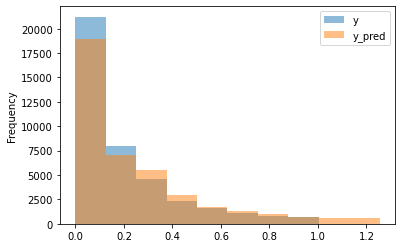

In [61]:
predicted_df.plot.hist(alpha=0.5)
plt.show()

#### How Sklearn Scalers Work

In [65]:
float_list = [[0.2343454, 0.1232234543, 0.665744545],
             [0.8768868, 0.454644545, 0.928933249]]
float_list

[[0.2343454, 0.1232234543, 0.665744545], [0.8768868, 0.454644545, 0.928933249]]

In [66]:
mm_scaler.fit_transform(np.array(float_list[0]).reshape(-1, 1))

array([[0.20482512],
       [0.        ],
       [1.        ]])

In [67]:
mm_scaler.fit_transform(np.array(float_list[1]).reshape(-1, 1))

array([[0.8902642],
       [0.       ],
       [1.       ]])

##### This happens when a 2d arr is fitted in the scaler

In [68]:
mm_scaler.fit_transform(float_list)

array([[0., 0., 0.],
       [1., 1., 1.]])

##### But this should be the output

In [69]:
mm_scaler.fit_transform(np.array(float_list).reshape(-1, 1))

array([[0.13791808],
       [0.        ],
       [0.67334553],
       [0.93540298],
       [0.41134053],
       [1.        ]])